<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Notebook 3
## Basic EDA Across Subreddits

---
## Section 1: Imports

---

**BELOW:** Importing Python libraries for processing and testing my first Subreddit. With help from a [YouTube video](https://www.youtube.com/watch?v=AcrjEWsMi_E&feature=youtu.be) by GA instructor Riley Dallas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

---
## Section 2: Audio Engineering EDA
---

In [2]:
# Importing Audio Engineering dataframe.
audio_df = pd.read_csv('../data/audioengineering_subreddit_01.csv')
audio_df.head(2)

,subreddit,author,title,selftext,full_post
0,audioengineering,Tuniac,Help Identifying a Mic,[https://www.youtube.com/watch?v=Gr9mOTKQELE&a...,Help Identifying a Mic [https://www.youtube.co...
1,audioengineering,out-of-the-ordinary,Import eq filters to t.racks dsp 4x4 mini from...,"Hello dear people of the internet,\n\n&amp;#x2...",Import eq filters to t.racks dsp 4x4 mini from...


In [3]:
audio_df = audio_df.drop(columns = ['author', 'title', 'selftext'])
audio_df.head(2)

,subreddit,full_post
0,audioengineering,Help Identifying a Mic [https://www.youtube.co...
1,audioengineering,Import eq filters to t.racks dsp 4x4 mini from...


**BELOW:** Instantiating and fitting a CountVectorizer instance to explore my data further. With guidance from Lesson 5.04.

In [4]:
cvec = CountVectorizer()
X = audio_df['full_post']
cvec.fit(X)
X_trans = cvec.transform(X)

In [5]:
cvec.get_feature_names()[0:10]

['00', '000', '000eur', '000ish', '001', '002', '0023', '007', '01', '012']

In [6]:
X_trans.shape

(4584, 18862)

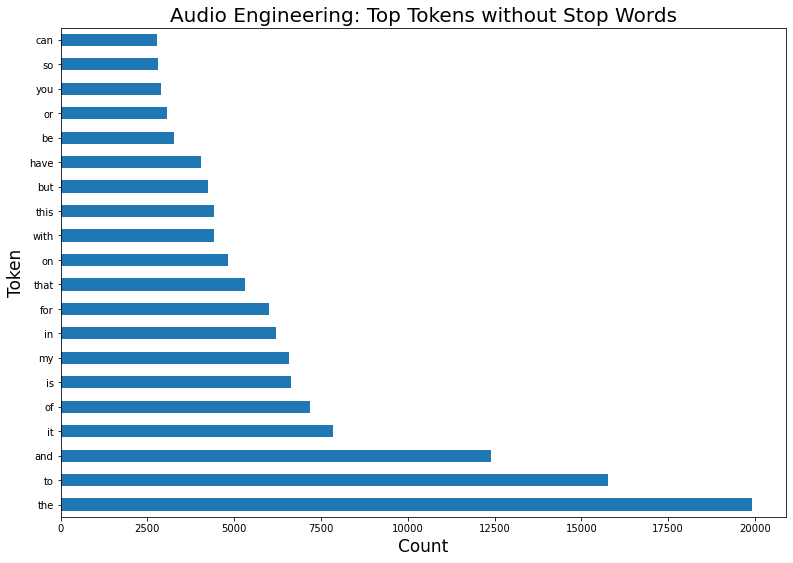

In [7]:
# Saving my training data to a dataframe using the pandas method 'todense()', and setting columns as my tokens from the cvec model.
X_df = pd.DataFrame(X_trans.todense(), columns = cvec.get_feature_names())

# Plotting most frequently occurring words in a bar chart.
plt.figure(figsize = (13, 9))
X_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.xlabel('Count', size = 17)
plt.ylabel('Token', size = 17)
plt.title('Audio Engineering: Top Tokens without Stop Words', size = 20);

---

In [8]:
# Looking at most frequently occurring words with stop words set to English.
cvec2 = CountVectorizer(stop_words = 'english')
X2 = audio_df['full_post']
cvec2.fit(X)
X_trans2 = cvec2.transform(X)

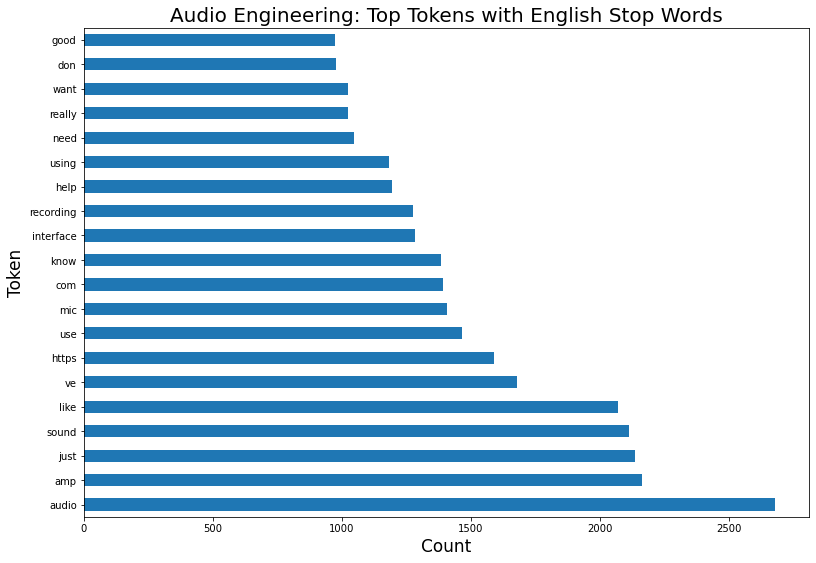

In [9]:
# Saving my training data to a dataframe using the pandas method 'todense()', and setting columns as my tokens from the cvec model.
X2_df = pd.DataFrame(X_trans2.todense(), columns = cvec2.get_feature_names())

# Plotting most frequently occurring words in a bar chart.
plt.figure(figsize = (13, 9))
X2_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.xlabel('Count', size = 17)
plt.ylabel('Token', size = 17)
plt.title('Audio Engineering: Top Tokens with English Stop Words', size = 20);

---

In [10]:
# Defining my own stop words, to be used in conjunction with the default English stop words.
my_stops = ['ve', 'don', 'good', 'bad', 'https', 'com', 'www', 'll', 'just', 'want', 'new', 'like', 'does',
            'feel', 'think', 'use', 'amp', 'x200b','let', 'got', 'know', 'really', 'way', 'song', 'songs', 'audio']

In [11]:
# Combining my stop words list with the default sklearn English stop word list.
# With guidance from this Kaggle post: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/37679
from sklearn.feature_extraction import text

stops = text.ENGLISH_STOP_WORDS.union(my_stops)

---

In [12]:
# Looking at most frequently occurring words with stop words set to my custom list.
cvec3 = CountVectorizer(stop_words = stops)
X3 = audio_df['full_post']
cvec3.fit(X)
X_trans3 = cvec3.transform(X)

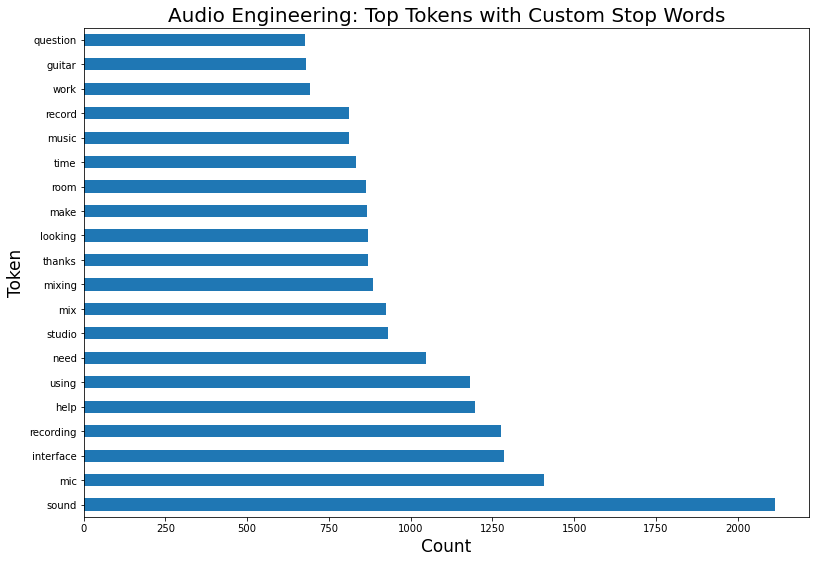

In [13]:
# Saving my training data to a dataframe using the pandas method 'todense()', and setting columns as my tokens from the cvec model.
X3_df = pd.DataFrame(X_trans3.todense(), columns = cvec3.get_feature_names())

# Plotting most frequently occurring words in a bar chart.
plt.figure(figsize = (13, 9))
X3_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.xlabel('Count', size = 17)
plt.ylabel('Token', size = 17)
plt.title('Audio Engineering: Top Tokens with Custom Stop Words', size = 20);

After using my custom stop words to filter out most common words in Audio Engineering, I noticed a trend of slightly more technical language, that was slightly more urgent in tone (e.g., "help", "time", "work"). Technical or technical-adjacent terminology makes up a large part of this list too - words like "mix", "interface", "studio", and even "room" in this case, as engineers often talk about "tuning a room" for an acoustically optimized monitoring environment.

---

### Senitment Analysis: Audio Engineering

In [14]:
# Instantiating a Sentiment Intensity Analyzer.
sent = SentimentIntensityAnalyzer()

In [15]:
posts = audio_df['full_post'].tolist()

In [16]:
# I worked on this function with Jessica B!
# Defining a function to analyze the sentiment of each post based on the VADER lexicon.
def sent_analysis(posts):
    # Creating an empty list to hold my compound scores.
    p_comps = []
    # Iterating through the posts in my dataframe.
    for post in posts:
        # Getting the individual polarity scores of each post.
        p_sent = sent.polarity_scores(post)
        # Appending just the compound sentiment score to my 'p_comps' list.
        p_comps.append(p_sent['compound'])
    return p_comps

In [17]:
# Setting the results of the above function equal to the variable 'compounds'.
audio_compounds = sent_analysis(posts)

In [18]:
# Mean compound polarity score for Audio Engineering subreddit.
sum(audio_compounds) / len(audio_compounds)

0.4877059554973825

**Compound Polarity Score:** The Compound Polarity Score generated by the `SentimentIntensityAnalyzer` is a rough judge of positivity and negativity in a text token, ranging from $-1$ (very negative) to $+1$ (very positive). The mean polarity score I see above of 0.488 implies that the Audio Engineering Subreddit's contributors tend to skew positive with the content they share!

---

---
## Section 3: Songwriting EDA
---

In [19]:
# Importing Songwriting dataframe.
song_df = pd.read_csv('../data/songwriting_subreddit_01.csv')
song_df.head(2)

,subreddit,author,title,selftext,full_post
0,Songwriting,3rrr6,"A ""melody first, lyrics last"" songwriting proc...","1. Find a key, tempo, and time signature you l...","A ""melody first, lyrics last"" songwriting proc..."
1,Songwriting,PjoSuperFan1,Teen Music Makers Discord,\nI’m looking for new teen members (ages 13-19...,Teen Music Makers Discord \nI’m looking for ne...


In [20]:
song_df = song_df.drop(columns = ['author', 'title', 'selftext'])
song_df.head(2)

,subreddit,full_post
0,Songwriting,"A ""melody first, lyrics last"" songwriting proc..."
1,Songwriting,Teen Music Makers Discord \nI’m looking for ne...


**BELOW:** Instantiating and fitting a CountVectorizer instance to explore my data further. With guidance from Lesson 5.04.

In [21]:
cvec = CountVectorizer()
X = song_df['full_post']
cvec.fit(X)
X_trans = cvec.transform(X)

In [22]:
cvec.get_feature_names()[0:10]

['00',
 '000',
 '0003ffd1fc09',
 '00am',
 '01',
 '01suad11bco51',
 '02',
 '032',
 '04',
 '05']

In [23]:
X_trans.shape

(4709, 16552)

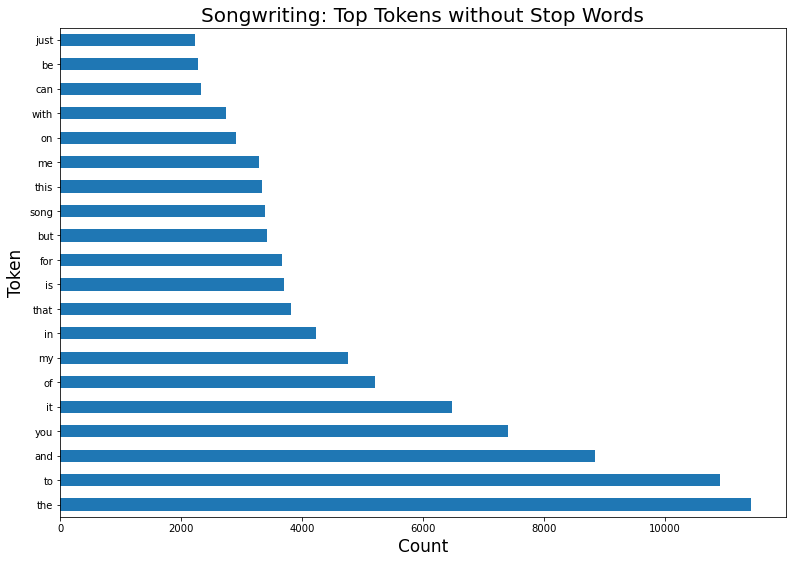

In [24]:
# Saving my training data to a dataframe using the pandas method 'todense()', and setting columns as my tokens from the cvec model.
X_df = pd.DataFrame(X_trans.todense(), columns = cvec.get_feature_names())

# Plotting most frequently occurring words in a bar chart.
plt.figure(figsize = (13, 9))
X_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.xlabel('Count', size = 17)
plt.ylabel('Token', size = 17)
plt.title('Songwriting: Top Tokens without Stop Words', size = 20);

---

In [25]:
# Looking at most frequently occurring words with stop words set to English.
cvec2 = CountVectorizer(stop_words = 'english')
X2 = song_df['full_post']
cvec2.fit(X)
X_trans2 = cvec2.transform(X)

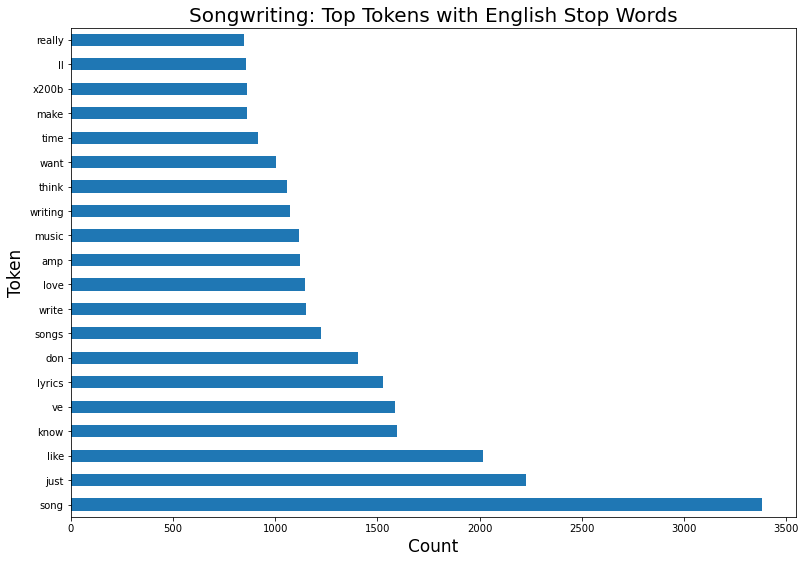

In [26]:
# Saving my training data to a dataframe using the pandas method 'todense()', and setting columns as my tokens from the cvec model.
X2_df = pd.DataFrame(X_trans2.todense(), columns = cvec2.get_feature_names())

# Plotting most frequently occurring words in a bar chart.
plt.figure(figsize = (13, 9))
X2_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.xlabel('Count', size = 17)
plt.ylabel('Token', size = 17)
plt.title('Songwriting: Top Tokens with English Stop Words', size = 20);

---

In [27]:
# Looking at most frequently occurring words with stop words set to my custom list.
cvec3 = CountVectorizer(stop_words = stops)
X3 = song_df['full_post']
cvec3.fit(X)
X_trans3 = cvec3.transform(X)

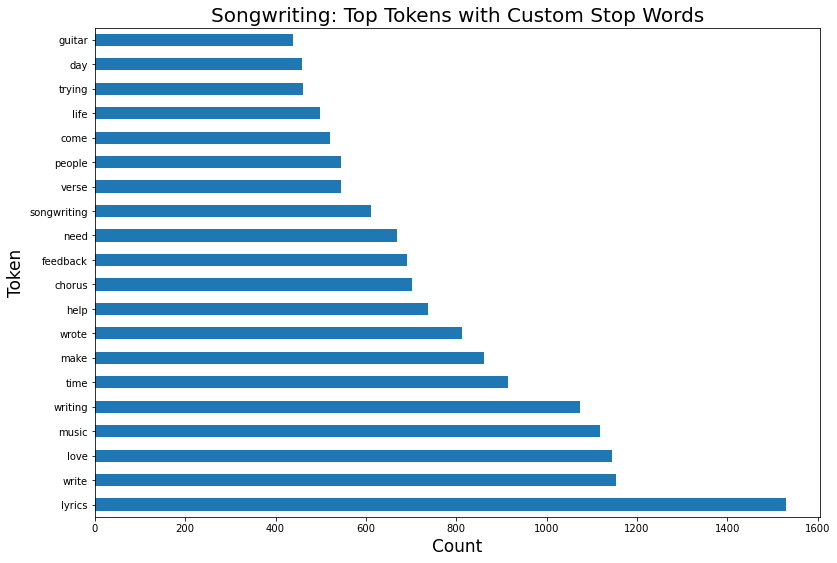

In [28]:
# Saving my training data to a dataframe using the pandas method 'todense()', and setting columns as my tokens from the cvec model.
X3_df = pd.DataFrame(X_trans3.todense(), columns = cvec3.get_feature_names())

# Plotting most frequently occurring words in a bar chart.
plt.figure(figsize = (13, 9))
X3_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')
plt.xlabel('Count', size = 17)
plt.ylabel('Token', size = 17)
plt.title('Songwriting: Top Tokens with Custom Stop Words', size = 20);

After using my custom stop words to filter out most common words in Songwriting, I noticed a trend of softer, emotionally supportive language, with words like "love", "life", "people", and "feedback" showing up in my top tokens. Other than that, the most commonly occurring words are expected for the topic at hand: "write", "lyrics", "chorus", "verse", "guitar" etc.

---

### Senitment Analysis: Songwriting

In [29]:
# Instantiating a Sentiment Intensity Analyzer.
sent = SentimentIntensityAnalyzer()

In [30]:
song_posts = song_df['full_post'].tolist()

In [31]:
# Reusing the sentiment analysis function from the Audio Engineering section.
song_compounds = sent_analysis(song_posts)

In [32]:
# Mean compound polarity score for Audio Engineering subreddit.
sum(song_compounds) / len(song_compounds)

0.32749571034189845

**Compound Polarity Score:** The mean polarity score I see above of 0.327 implies that the Songwriting Subreddit's contributors tend to skew positive with the content they share as well, but not quite as positive as the Audio Engineering user base. That notwithstanding, both scores suggest that these are positive communities!